In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import warnings

warnings.filterwarnings('ignore')

In [ ]:
def calculate_ema(data, column_name, window):
    data[f'EMA{window}'] = data[column_name].ewm(span=window, adjust=False).mean()

tickers = ["AAPL", "AMZN"]
start_date = "2019-01-01"
end_date = "2023-12-20"
# datetime.datetime.today().strftime("%Y-%m-%d")
tickers_df = {}

for i in tickers:
    tickers_df[i] = yf.download(i, start=start_date, end=end_date)
    tickers_df[i] = tickers_df[i][['Open', 'High', 'Low', 'Adj Close', 'Volume']]
    tickers_df[i].rename(columns={'Adj Close': 'Close'}, inplace=True)
    calculate_ema(tickers_df[i], 'Close', 12)
    calculate_ema(tickers_df[i], 'Close', 26)
    tickers_df[i]['MACD'] = tickers_df[i]['EMA12'] - tickers_df[i]['EMA26']
    tickers_df[i] = tickers_df[i].iloc[26:]
    # print('-'*20, i, '-'*20)
    # print(tickers_df[i])

data1, data2 = tickers_df[tickers[0]].round(2), tickers_df[tickers[1]].round(2)

[*********************100%%**********************]  1 of 1 completed
-------------------- AAPL --------------------
                  Open        High         Low       Close     Volume  \
Date                                                                    
2019-02-08   42.247501   42.665001   42.105000   41.065712   95280000   
2019-02-11   42.762501   42.802502   42.312500   40.829556   83973600   
2019-02-12   42.525002   42.750000   42.424999   41.181381   89134000   
2019-02-13   42.847500   43.119999   42.480000   41.010288   89960800   
2019-02-14   42.427502   42.814999   42.345001   41.159698   87342800   
...                ...         ...         ...         ...        ...   
2023-12-13  195.089996  198.000000  194.850006  197.960007   70404200   
2023-12-14  198.020004  199.619995  196.160004  198.110001   66831600   
2023-12-15  197.529999  198.399994  197.000000  197.570007  128256700   
2023-12-18  196.089996  196.630005  194.389999  195.889999   55751900   
2023-12-

In [ ]:
data1.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,EMA12,EMA26,MACD
count,217.000000,217.000000,217.000000,217.000000,2.170000e+02,217.000000,217.000000,217.000000
mean,175.582212,177.116359,174.335023,175.439309,5.761940e+07,174.219447,172.517604,1.701244
std,13.478729,13.354275,13.449910,13.521673,1.596672e+07,13.303567,13.839169,2.369536
min,144.380000,146.710000,143.900000,144.720000,2.404830e+07,147.360000,141.460000,-3.830000
25%,166.600000,168.560000,165.650000,166.770000,4.755110e+07,165.110000,162.530000,-0.190000
50%,176.650000,178.420000,175.400000,176.780000,5.379050e+07,176.680000,176.490000,2.670000
75%,187.700000,188.390000,185.670000,187.440000,6.304790e+07,183.880000,182.800000,3.410000
max,198.020000,199.620000,197.000000,198.110000,1.282567e+08,195.020000,191.490000,5.900000


In [ ]:
data2.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,EMA12,EMA26,MACD
count,217.000000,217.000000,217.000000,217.000000,2.170000e+02,217.000000,217.000000,217.000000
mean,123.202535,124.723548,121.752212,123.324839,5.660986e+07,122.116498,120.539124,1.577880
std,17.152974,17.191928,17.086399,17.189982,1.863372e+07,16.606594,16.306172,1.861607
min,89.970000,92.230000,88.120000,90.730000,2.237840e+07,93.490000,94.820000,-2.820000
25%,104.950000,105.960000,103.550000,104.980000,4.497040e+07,104.070000,102.590000,0.640000
50%,128.120000,129.580000,126.340000,128.150000,5.261070e+07,128.620000,128.340000,1.720000
75%,136.320000,137.450000,134.610000,135.520000,6.152940e+07,135.330000,133.980000,2.950000
max,154.400000,155.120000,152.690000,154.070000,1.529387e+08,149.100000,146.130000,4.950000


In [ ]:
data1['MACD'].apply(lambda x: 'Positive' if x >= 0 else 'Negative').value_counts()

Positive    159
Negative     58
Name: MACD, dtype: int64

In [ ]:
data2['MACD'].apply(lambda x: 'Positive' if x >= 0 else 'Negative').value_counts()

Positive    173
Negative     44
Name: MACD, dtype: int64

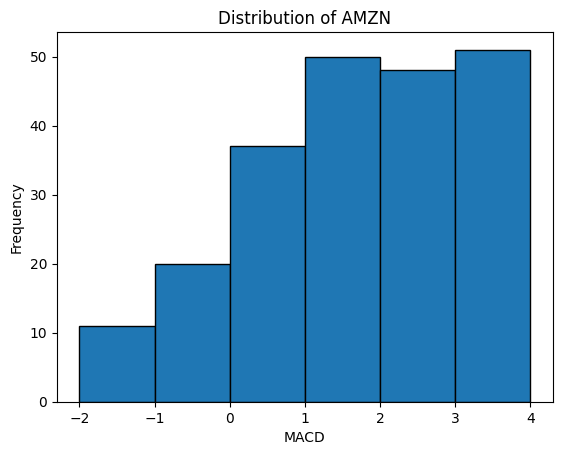

In [ ]:
import matplotlib.pyplot as plt
data2['MACD'] = data2['MACD'].astype(int)
plt.hist(data2['MACD'], bins=range(min(data2['MACD']), max(data2['MACD']) + 1), edgecolor='black')
plt.xlabel('MACD')
plt.ylabel('Frequency')
plt.title('Distribution of AMZN')
plt.show()

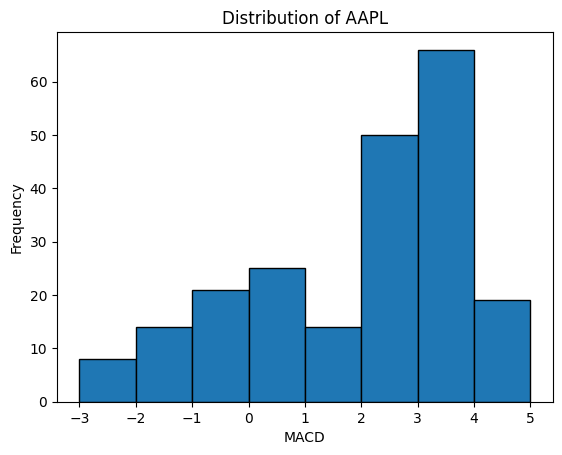

In [ ]:
import matplotlib.pyplot as plt
data1['MACD'] = data1['MACD'].astype(int)
plt.hist(data1['MACD'], bins=range(min(data1['MACD']), max(data1['MACD']) + 1), edgecolor='black')
plt.xlabel('MACD')
plt.ylabel('Frequency')
plt.title('Distribution of AAPL')
plt.show()

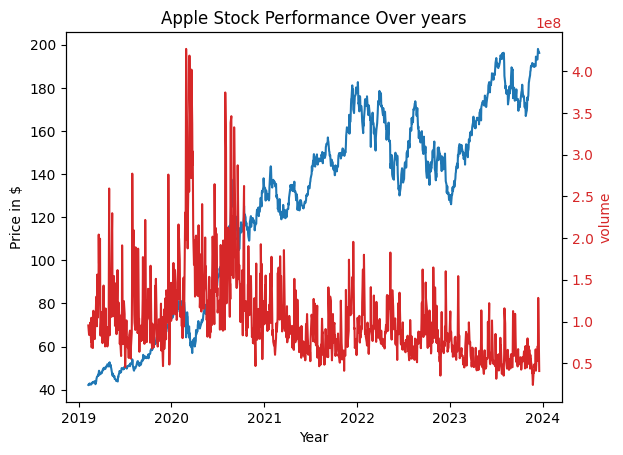

In [ ]:
# Apple Stock Plot
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib inline

x1 = data1.index
y1 = data1['Open']
y12= data1['Volume']

plt.title("Apple Stock Performance Over years")
plt.xlabel("Year")
plt.ylabel("Price in $")



plt.plot(x1,y1)


ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('volume', color=color)  # we already handled the x-label with ax1
ax2.plot(x1, y12, color=color)
ax2.tick_params(axis='y', labelcolor=color)



plt.show()

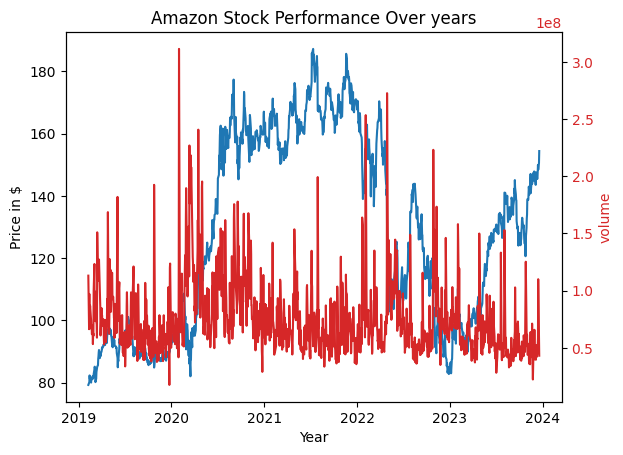

In [ ]:
# Amazon Stock Plot
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib inline

x2 = data2.index
y2 = data2['Open']
y22= data2['Volume']


plt.title("Amazon Stock Performance Over years")
plt.xlabel("Year")
plt.ylabel("Price in $")

plt.plot(x2,y2)


ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('volume', color=color)  # we already handled the x-label with ax1
ax2.plot(x2, y22, color=color)
ax2.tick_params(axis='y', labelcolor=color)




plt.show()

In [ ]:
import numpy as np
import random
import math, random
import gym
import numpy as np


class State:
    def __init__(self, data1, data2, data1_MACD, data2_MACD, Bal_stock1, Bal_stock2, open_cash, timestep):
        self.Stock1Price=data1[timestep] #stock 1 open price
        self.Stock2Price=data2[timestep] #stock 2 open price
        self.Stock1Blnc=Bal_stock1 #stock 1 balance
        self.Stock2Blnc=Bal_stock2 #stock 2 balance
        self.open_cash=open_cash #cash balance
        self.MACD_stock1=data1_MACD[timestep]
        self.MACD_stock2=data2_MACD[timestep]
        #self.volume1=volume1[timestep]
        #self.volume2=volume2[timestep]
        self.portfolio_value=self.portfolio_value()

    def portfolio_value(self):
        pvalue=0
        #print("In portfolio func")
        #print("self.Stock1Price",self.Stock1Price, type(self.Stock1Price))
        #print("self.Stock1Blnc",self.Stock1Blnc[0], type(self.Stock1Blnc))

        v1=self.Stock1Price * float(self.Stock1Blnc)
        v2=self.Stock2Price * float(self.Stock2Blnc)
        v3=float(self.open_cash)
        return (v1+v2+v3)

    #def next_opening_price(self):
    #    return [data1[timestep+1], data2[timestep+1]]


    def reset(self):
        #self.state = torch.FloatTensor(torch.zeros(8)).cuda()
        self.Stock1Price=42.247501 #stock 1 open price Apple
        self.Stock2Price=79.300003 #stock 2 open price Amazon
        self.Stock1Blnc=592 #stock 1 balance Apple
        self.Stock2Blnc=317 #stock 2 balance Amazon
        self.open_cash=100000 #cash balance
        self.MACD_stock1=1.108507
        self.MACD_stock2=0.356872
        self.portfolio_value=100000

    def getState(self):
        #print("In get state")
        res=[]
        res.append(self.Stock1Price) #stock 1 open price
        res.append(self.Stock2Price) #stock 2 open price
        res.append(self.Stock1Blnc) #stock 1 balance
        res.append(self.Stock2Blnc) #stock 2 balance
        res.append(self.open_cash) #cash balance
        res.append(self.MACD_stock1)
        res.append(self.MACD_stock2)
        res.append(self.portfolio_value)
        #res.append(self.volume1)
        #res.append(self.volume2)



        #print(res)
        res1=np.array([res])
        #print("res array"+np.array([res]))
        return res1

In [ ]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam

import numpy as np
import random
from collections import deque

class Agent:
    def __init__(self, state_size, is_eval=False, model_name=""):
        self.state_size = state_size # normalized previous days
        self.action_size = 5 #  buy_1, sell_1,DO Nothing, buy2, sell2
        self.memory = deque(maxlen=1000)
        self.inventory1 = []
        self.inventory2 = []
        self.model_name = model_name
        self.is_eval = is_eval
        self.gamma = 0.95 #gamma is the discount factor. It quantifies how much importance we give for future rewards.
        self.epsilon = 1.0 #Exploration and Exploitation — Epsilon (ε)
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.95
        self.model = load_model("models/" + model_name) if is_eval else self._model()

    def _model(self):
        model = Sequential()
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(lr=0.01))
        return model

    def act(self, state):
        if not self.is_eval and random.random() <= self.epsilon:
            #print("random action")
            return random.randrange(self.action_size)
        #print("Calculating using model")
        options = self.model.predict(state)
        #print(str(options))
        return np.argmax(options[0])

    def expReplay(self, batch_size):
        mini_batch = []
        l = len(self.memory)

        mini_batch = random.sample(self.memory, batch_size)

        for state, action, reward, next_state, done in mini_batch:
            target = reward

            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])

            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [ ]:


import pandas as pd

import sys

import pandas as pd
import datetime
import math, random
import numpy as np
from datetime import datetime, timedelta


data1.reset_index(inplace=True)
data2.reset_index(inplace=True)

#timestamp = data1_date[10]
#print(timestamp.strftime('%Y-%m-%d'))
list1= data1['Date']
list2= data2['Date']
diff_pd1_data = list(set(list1) - set(list2))
diff_pd2_data = list(set(list2) - set(list1))
#x11=x[0].strftime('%Y-%m-%d 00:00:00')
#p=datetime.datetime.strptime(x11, "%Y-%m-%d 00:00:00")
#print(p)

for k in range(len(diff_pd1_data)):
    pd1_dat_format=diff_pd1_data[k].strftime('%Y-%m-%d 00:00:00')
    date_format_pd1=datetime.datetime.strptime(pd1_dat_format, "%Y-%m-%d 00:00:00")
    for i, j in enumerate(list1):
        if j == date_format_pd1:
            #print(i)
            data1=data1.drop([i])
#data1=data1.reset_index(drop=True)

for k in range(len(diff_pd2_data)):
    pd2_dat_format=diff_pd2_data[k].strftime('%Y-%m-%d 00:00:00')
    date_format_pd2=datetime.datetime.strptime(pd2_dat_format, "%Y-%m-%d 00:00:00")
    for M, N in enumerate(list2):
        if N == date_format_pd2:
            #print(M)
            data2=data2.drop([M])

#data2=data2.reset_index(drop=True)

print(data1,data2)


          Date        Open        High         Low       Close     Volume  \
0   2023-02-09  153.779999  154.330002  150.419998  150.031403   56007100   
1   2023-02-10  149.460007  151.339996  149.220001  150.399887   57450700   
2   2023-02-13  150.949997  154.259995  150.919998  153.228439   62199000   
3   2023-02-14  152.119995  153.770004  150.860001  152.581055   61707600   
4   2023-02-15  153.110001  155.500000  152.880005  154.702454   65573800   
..         ...         ...         ...         ...         ...        ...   
212 2023-12-13  195.089996  198.000000  194.850006  197.960007   70404200   
213 2023-12-14  198.020004  199.619995  196.160004  198.110001   66831600   
214 2023-12-15  197.529999  198.399994  197.000000  197.570007  128256700   
215 2023-12-18  196.089996  196.630005  194.389999  195.889999   55751900   
216 2023-12-19  196.160004  196.949997  195.889999  196.940002   40714100   

          EMA12       EMA26      MACD  
0    147.361218  141.460054  5.9011

In [ ]:
import time
start_time = time.time()
training = 857
test = 368
start_balance = 100000

pd_data1_train=data1[0:training]
pd_data2_train=data2[0:training]

data1_open=pd_data1_train['Open']
data2_open=pd_data2_train['Open']
data1_MACD=pd_data1_train['MACD']
data2_MACD=pd_data2_train['MACD']

pd_data1_test=data1[training:training+test]
pd_data2_test=data2[training:training+test]

episode_count=50

total_Prof=[]
total_stock1bal=[]
total_stock2bal=[]
total_open_cash=[]
total_port_value=[]
total_days_played=[]
batch_size = 64
for e in range(1,episode_count+1):
  Bal_stock1=int(np.floor((start_balance/4)/data1_open[0]))
  Bal_stock2=int(np.floor((start_balance/4)/data2_open[0]))
  open_cash=start_balance/2
  datasize=training
  done=False
  total_profit=0
  reward = 0
  agent = Agent(8)
  agent.inventory1 =[]
  agent.inventory2 =[]
  for i in range(Bal_stock1):
    agent.inventory1.append(data1_open[0])
  for i in range(Bal_stock2):
    agent.inventory2.append(data2_open[0])

  for t in range(datasize):

    state_class_obj= State(data1_open, data2_open, data1_MACD, data2_MACD, Bal_stock1, Bal_stock2, open_cash,t)
    state_array_obj=state_class_obj.getState()
    action = agent.act(state_array_obj)
    if action == 0:  # buy stock1
      if state_class_obj.Stock1Price > state_class_obj.open_cash:
        reward = -20000  # no money to buy stock1, bankrupt, episode ends
        done = True
      else:
        agent.inventory1.append(data1_open[t])
        Bal_stock1_t1=len(agent.inventory1)
        Bal_stock2_t1=len(agent.inventory2)
        open_cash_t1=state_class_obj.open_cash-state_class_obj.Stock1Price
          # buy stock1 reward, considering MACD, price change and available cash
        if (state_class_obj.open_cash<500):
          reward=-20000
        elif state_class_obj.MACD_stock1 > 0:
          reward = abs(state_class_obj.MACD_stock1) * 10000  # positive reward, buy when MACD is positive
        elif state_class_obj.MACD_stock1 < 0:
          reward = -abs(state_class_obj.MACD_stock1) * 10000  # negative reward according to the negative level of MACD


    if action == 1:  # sell stock1
      if state_class_obj.Stock1Blnc < 1:
        reward = -20000  # no stock1 to sell, bankrupt, episode ends
        done = True
      else:
        bought_price1=agent.inventory1.pop(0)
        Bal_stock1_t1=len(agent.inventory1)
        Bal_stock2_t1=len(agent.inventory2)
        open_cash_t1=state_class_obj.open_cash+state_class_obj.Stock1Price
        # sell stock1 reward, considering MACD, price change and stock1 balance
        if (state_class_obj.Stock1Blnc<10):
          reward=-20000
        elif state_class_obj.MACD_stock1 < 0:
          reward = abs(state_class_obj.MACD_stock1) * 10000 
        elif state_class_obj.MACD_stock1 > 0:
          reward = -abs(state_class_obj.MACD_stock1) * 10000 


    if action == 2:  # do nothing
      # reward for doing nothing
      if (state_class_obj.open_cash<0.1*start_balance):
        reward = 20000
      elif abs(state_class_obj.MACD_stock1) <= 1 and abs(state_class_obj.MACD_stock2) <= 1:
        reward = 10000  # MACD较小，给予正向奖励
      elif abs(state_class_obj.MACD_stock1) > 1 or abs(state_class_obj.MACD_stock2) > 1:
        reward = -abs(state_class_obj.MACD_stock1) * 5000 - abs(state_class_obj.MACD_stock2) * 5000  
        # give negative reward according to the absolute value of MACD, encourage the agent to take action

      Bal_stock1_t1=len(agent.inventory1)
      Bal_stock2_t1=len(agent.inventory2)
      open_cash_t1= open_cash

    if action == 3:  # buy stock2
      if state_class_obj.Stock2Price > state_class_obj.open_cash:
        reward = -20000 
        done = True
      else:
        agent.inventory2.append(data2_open[t])
        Bal_stock1_t1=len(agent.inventory1)
        Bal_stock2_t1=len(agent.inventory2)
        open_cash_t1=state_class_obj.open_cash-state_class_obj.Stock2Price

        if (state_class_obj.open_cash<500):
          reward=-20000
        elif state_class_obj.MACD_stock2 > 0:
          reward = abs(state_class_obj.MACD_stock2) * 10000 
        elif state_class_obj.MACD_stock2 < 0:
          reward = -abs(state_class_obj.MACD_stock2) * 10000

    if action == 4:  # sell stock2
      if state_class_obj.Stock2Blnc < 1:
        reward = -20000  
        done = True
      else:
        bought_price2=agent.inventory2.pop(0)
        Bal_stock1_t1=len(agent.inventory1)
        Bal_stock2_t1=len(agent.inventory2)
        open_cash_t1=state_class_obj.open_cash+state_class_obj.Stock2Price

        if (state_class_obj.Stock2Blnc<10):
          reward=-20000
        elif state_class_obj.MACD_stock2 < 0:
          reward = abs(state_class_obj.MACD_stock2) * 10000
        elif state_class_obj.MACD_stock2 > 0:
          reward = -abs(state_class_obj.MACD_stock2) * 10000

        total_profit += state_class_obj.Stock2Price - bought_price2

    if t == datasize-1:
      #print("t==datasize")
      done=True
      next_state_class_obj=State(data1_open, data2_open,data1_MACD,data2_MACD, Bal_stock1_t1, Bal_stock2_t1, open_cash_t1,t)
      next_state_array_obj=next_state_class_obj.getState()
    else:
      next_state_class_obj=State(data1_open, data2_open,data1_MACD,data2_MACD, Bal_stock1_t1, Bal_stock2_t1, open_cash_t1,t+1)
      next_state_array_obj=next_state_class_obj.getState()
    agent.memory.append((state_array_obj, action, reward, next_state_array_obj, done))

    Bal_stock1=Bal_stock1_t1
    Bal_stock2=Bal_stock2_t1
    open_cash=open_cash_t1

    if done==True:

      total_Prof.append(total_profit)
      total_stock1bal.append(len(agent.inventory1))
      total_stock2bal.append(len(agent.inventory2))
      total_open_cash.append(state_class_obj.open_cash)
      total_port_value.append(state_class_obj.portfolio_value)
      total_days_played.append(t)

      print("--------------------------------")
      state_class_obj.reset()
      break

    if len(agent.memory) > batch_size:
      agent.expReplay(batch_size)
  if e % 10 == 0:
    agent.model.save("models/model_ep" + str(e))

end_time = time.time()
execution_time = "{:.0f}".format((end_time - start_time)/60)
print(f"execution time: {execution_time} ")

1/1 [==============================] - 0s 22ms/step


KeyboardInterrupt: ignored

In [ ]:
print("Total Apple stocks in episodes"+ str(total_stock1bal))
print("Total Amazon stocks in episodes"+ str(total_stock2bal))
print("Total Open cash in episodes"+ str(total_open_cash))
print("Total Portfolio value in episodes"+ str(total_port_value))
print("Total Days in episodes"+ str(total_days_played))



Total Apple stocks in episodes[27]
Total Amazon stocks in episodes[28]
Total Open cash in episodes[2546.1099548339844]
Total Portfolio value in episodes[11182.599822998047]
Total Days in episodes[139]


## Test

In [ ]:
import time
start_time = time.time()
training = 857
test = 368
start_balance = 100000

pd_data1_test=data1[training:training+test]
pd_data2_test=data2[training:training+test]

In [ ]:
#Initialize state and set benchmarking model
total_Prof=[]
done=False

Act_datasize = test

# Take Opening price in a new variable
data1_test=pd_data1_test['Open']
data2_test=pd_data2_test['Open']
data1_date=pd_data1_test.index.tolist()

data1_MACD_test=pd_data1_test['MACD']
data2_MACD_test=pd_data2_test['MACD']

Act_Bench_Stock1_Bal=int(np.floor((start_balance/4)/data1_test[0]))
Act_Bench_Stock2_Bal=int(np.floor((start_balance/4)/data2_test[0]))
Act_Bench_Open_cash=start_balance/2
open_cash_t2= Act_Bench_Open_cash

initial_cash = 100000

### Benchmark of test data

In [ ]:
# Program to calculate benchmark profit
# Sell 10% of stock in 10 intervals based on MACD signals
# Buy 10% of open cash in 10 intervals based on MACD signals

interval = Act_datasize // 10
Total_Stock1_Amount = 0
Total_Stock2_Amount = 0
stocks2Value = 0
stocks1Value = 0

Act_stocks1 = np.floor(Act_Bench_Stock1_Bal / 10)
Act_stocks2 = np.floor(Act_Bench_Stock2_Bal / 10)

remaining_stock1 = Act_Bench_Stock1_Bal
remaining_stock2 = Act_Bench_Stock2_Bal
ttl = 0

Benchmark_Port_Value = []


for j in range(interval, Act_datasize + 1, interval):
    Price_closing_Stock1=data1_test[j-1]
    Price_closing_Stock2=data2_test[j-1]

    # Check MACD signals for stock 1
    if data1_MACD_test[j - 1] <= 0 and remaining_stock1 > 0:
        stocks1Value = Act_stocks1 * Price_closing_Stock1
        remaining_stock1 -= Act_stocks1


    elif data1_MACD_test[j - 1] > 0:
        buy_percentage = 0.1
        cash_for_stock1 = Act_Bench_Open_cash * buy_percentage
        stocks1_to_buy = np.floor(cash_for_stock1 / Price_closing_Stock1)
        remaining_stock1 += stocks1_to_buy
        Act_Bench_Open_cash -= stocks1_to_buy * Price_closing_Stock1


    # Check MACD signals for stock 2
    if data2_MACD_test[j - 1] <= 0 and remaining_stock2 > 0:
        stocks2Value = Act_stocks2 * Price_closing_Stock2
        remaining_stock2 -= Act_stocks2

    elif data2_MACD_test[j - 1] > 0:
        buy_percentage = 0.1
        cash_for_stock2 = Act_Bench_Open_cash * buy_percentage
        stocks2_to_buy = np.floor(cash_for_stock2 / Price_closing_Stock2)
        remaining_stock2 += stocks2_to_buy
        Act_Bench_Open_cash -= stocks2_to_buy * Price_closing_Stock2

    # Update remaining stocks and open cash
    Stock1_Port_value = remaining_stock1 * Price_closing_Stock1
    Stock2_Port_value = remaining_stock2 * Price_closing_Stock2
    Act_Bench_Open_cash = Act_Bench_Open_cash + stocks1Value + stocks2Value

    Total_Portfolio_value = Act_Bench_Open_cash + Stock1_Port_value + Stock2_Port_value
    Benchmark_Port_Value.append([data1_date[j - 1].strftime('%Y-%m-%d'), Total_Portfolio_value])

Test_Benchmark_Portfolio_Value = Total_Portfolio_value

print("Benchmark_Profit is ", round(Test_Benchmark_Portfolio_Value, 2),
      " with remaining Apple Stocks: ", str(remaining_stock1),
      " and remaining Amazon stocks: ", str(remaining_stock2))


### Actual test

In [ ]:
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

In [ ]:
#Actual run
episode_count=0

#Define arrays to store per episode values
Act_total_Prof=[]
Act_total_stock1bal=[]
Act_total_stock2bal=[]
Act_total_open_cash=[]
Act_total_port_value=[]
Act_total_days_played=[]
actions_done_perday=[]
portfolio_value=[]

In [ ]:
from keras.models import load_model

model_name='model_ep50'

model = load_model("models/" + model_name)
model.summary()

In [ ]:
for e in range(1): #here we run only for 1 episode, as it is Test run

    Bal_stock1_t2=Act_Bench_Stock1_Bal
    Bal_stock2_t2=Act_Bench_Stock2_Bal
    done=False
    open_cash_t2=open_cash_t2
    total_profit = 0
    reward = 0

    #Initialize Agent
    agent_test = Agent(8, is_eval=True, model_name=model_name)

    agent_test.inventory1 =[]
    agent_test.inventory2 =[]
    for i in range(Bal_stock1_t2):
        agent_test.inventory1.append(data1_test[0])
    for i in range(Bal_stock2_t2):
        agent_test.inventory2.append(data2_test[0])


    #Timestep delta to make sure that with time reward increases for taking action
    timestep_delta=0

    #Running episode over all days in the datasize
    for t in range(Act_datasize):
        print("..........")

        print(pd_data1_test.iloc[t,0])
        state_class_obj= State(data1_test, data2_test, data1_MACD_test, data2_MACD_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t)
        state_array_obj=state_class_obj.getState()
        action = agent_test.act(state_array_obj)

        print("Total portfolio value: " + str(state_class_obj.portfolio_value)+
                  "  stock 1 number: " + str(len(agent_test.inventory1))
                   +"  stock 2 number: "+str(len(agent_test.inventory2))+"  open cash: "+str(state_class_obj.open_cash))

        if action == 0:  #buy stock 1
            if state_class_obj.Stock1Price > state_class_obj.open_cash:
                reward = -20000
                done = True
                #end episode

            else:
                #print("In Buy stock 1")
                agent_test.inventory1.append(data1_test[t])
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash-state_class_obj.Stock1Price 
                if (state_class_obj.open_cash<500):
                  reward=-20000
                elif state_class_obj.MACD_stock1 > 0:
                  reward = abs(state_class_obj.MACD_stock1) * 10000 
                elif state_class_obj.MACD_stock1 < 0:
                  reward = -abs(state_class_obj.MACD_stock1) * 10000 
        if action == 1:  #sell stock 1
            if state_class_obj.Stock1Blnc <1 :
                reward = -20000
                done = True
                #end episode
            else:
                bought_price1=agent_test.inventory1.pop(0)
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash+state_class_obj.Stock1Price #State[0] is the price of stock 1. Here we are buying 1 stoc
                if (state_class_obj.Stock1Blnc<10):
                  reward=-20000
                elif state_class_obj.MACD_stock1 < 0:
                  reward = abs(state_class_obj.MACD_stock1) * 10000 
                elif state_class_obj.MACD_stock1 > 0:
                  reward = -abs(state_class_obj.MACD_stock1) * 10000

        if action == 2:
            if (state_class_obj.open_cash<0.1*start_balance):
                reward = 20000
            elif abs(state_class_obj.MACD_stock1) <= 1 and abs(state_class_obj.MACD_stock2) <= 1:
                reward = 10000  
            elif abs(state_class_obj.MACD_stock1) > 1 or abs(state_class_obj.MACD_stock2) > 1:
                reward = -abs(state_class_obj.MACD_stock1) * 5000 - abs(state_class_obj.MACD_stock2) * 5000  

            Bal_stock1_t2= len(agent_test.inventory1)
            Bal_stock2_t2=len(agent_test.inventory2)
            open_cash_t2= open_cash_t2


        if action == 3:  #buy stock 2
            if state_class_obj.Stock2Price > state_class_obj.open_cash:
                reward = -20000
                done = True

            else:
                #print("In Buy stock 2")
                agent_test.inventory2.append(data2_test[t])
                Bal_stock1_t2=len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash-state_class_obj.Stock2Price

                if (state_class_obj.open_cash<500):
                  reward=-20000
                elif state_class_obj.MACD_stock2 > 0:
                  reward = abs(state_class_obj.MACD_stock2) * 10000 
                elif state_class_obj.MACD_stock2 < 0:
                  reward = -abs(state_class_obj.MACD_stock2) * 10000


        if action == 4:  #sell stock 2
            if state_class_obj.Stock2Blnc <1 :
                reward = -20000
                done = True

            else:
                #print("In sell stock 2")
                bought_price2=agent_test.inventory2.pop(0)
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash+state_class_obj.Stock2Price

                if (state_class_obj.Stock2Blnc<10):
                  reward=-20000
                elif state_class_obj.MACD_stock2 < 0:
                  reward = abs(state_class_obj.MACD_stock2) * 10000 
                elif state_class_obj.MACD_stock2 > 0:
                  reward = -abs(state_class_obj.MACD_stock2) * 10000  

                total_profit += state_class_obj.Stock2Price - bought_price2

        if t == Act_datasize-1:
            done=True
            next_state_class_obj=State(data1_test, data2_test, data1_MACD_test, data2_MACD_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t)
            next_state_array_obj=next_state_class_obj.getState()
        else:
            next_state_class_obj=State(data1_test, data2_test, data1_MACD_test, data2_MACD_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t+1)
            next_state_array_obj=next_state_class_obj.getState()

        #print("Action is "+str(action)+" reward is" + str(reward))

        actions_done_perday.append(action)
        portfolio_value.append(next_state_class_obj.portfolio_value)

        if done==True:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(next_state_class_obj.portfolio_value - initial_cash))
            print("Total No. of days played: " + str(t)+ "  out of overall days:  " + str(Act_datasize))
            print("Total portfolio value: " + str(next_state_class_obj.portfolio_value)+
                  "  stock 1 number: " + str(len(agent_test.inventory1))
                   +"  stock 2 number: "+str(len(agent_test.inventory2))+"  open cash: "+str(next_state_class_obj.open_cash))

            Act_total_Prof.append(total_profit)
            Act_total_stock1bal.append(len(agent_test.inventory1))
            Act_total_stock2bal.append(len(agent_test.inventory2))
            Act_total_open_cash.append(state_class_obj.open_cash)
            Act_total_port_value.append(state_class_obj.portfolio_value)
            Act_total_days_played.append(t)


            print("--------------------------------")
            state_class_obj.reset()
            break

In [ ]:
len(portfolio_value)

In [ ]:
# Test Stock Prices and actions taken by agent Stock Plot
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib inline

pd_bm=pd.DataFrame.from_records(Benchmark_Port_Value)
pd_bm[0]=pd.to_datetime(pd_bm[0], format='%Y/%m/%d')

x1 = np.array(data1_date)
y1 = portfolio_value

x2=pd_bm[0]
y2=pd_bm[1]


plt.title("Portfolio Value vs Benchmark Over Test Data")
plt.xlabel("Days")
plt.ylabel("Portfolio Value in $")

plt.plot(x1,y1)
plt.plot_date(x2, y2, c = 'red', marker='v', linestyle='-')


#plt.plot(x1, z, '-', color='black');
plt.plot(x1, y1, '-', color='blue');

#plt.scatter(x1,Benchmark_Port_Value,marker='o')

plt.legend(('Trading Model', 'Benchmark'))
plt.xticks(rotation='vertical')
plt.show()